#  Pens and Printers - Product Sales Analysis

## Problem Statement

**Pens and Printers** was founded in 1984 and provides high quality office products to large
organizations. We are a trusted provider of everything from pens and notebooks to desk
chairs and monitors. We don’t produce our own products but sell those made by other
companies.

We have built long lasting relationships with our customers and they trust us to provide them with the best products for them. As the way in which consumers buy products is changing,our sales tactics have to change too. **Launching a new product line is expensive and we need to make sure we are using the best techniques to sell the new product effectively.**

The best approach may vary for each new product so we need to learn quickly what works and what doesn’t.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data into a dataframe
df = pd.read_csv("product_sales.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB
None


In [3]:
# View data
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


## Data Cleaning and Transformation

In [4]:
# Check the presence of missing values
df.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

The revenue column has 1074 missing values.

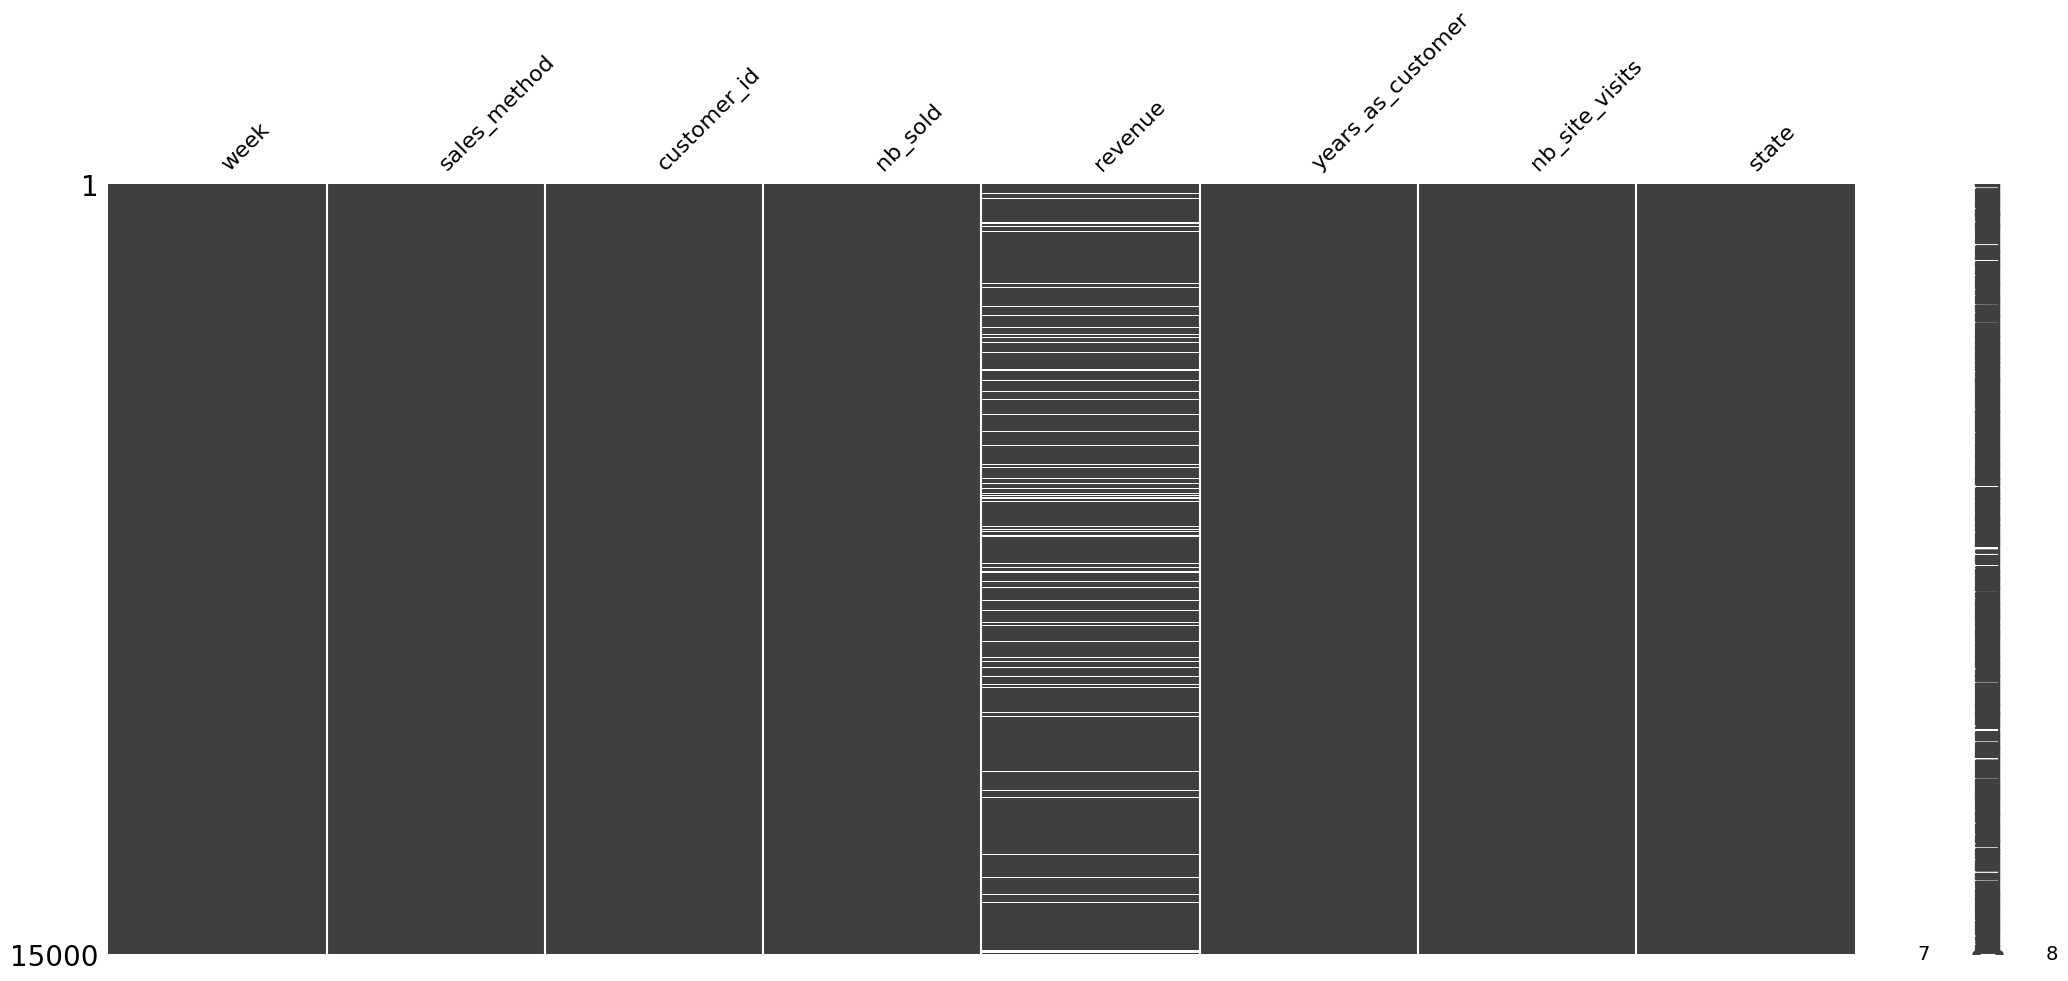

In [5]:
# Examine the nature of missing values
import missingno as msno
from scipy.stats import chi2_contingency

# Visualize missingness
msno.matrix(df);


Since we can see that there is no correlations among the missing values, this suggests that the nature of the missingness is completely at random(MCAR) and the appropriate treatment is to drop the rows with missing values.

In [6]:
# Drop the missing values
df = df.dropna()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13926 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13926 non-null  int64  
 1   sales_method       13926 non-null  object 
 2   customer_id        13926 non-null  object 
 3   nb_sold            13926 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  13926 non-null  int64  
 6   nb_site_visits     13926 non-null  int64  
 7   state              13926 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 979.2+ KB
None


In [31]:
# Check uniqueness of the data
for col in df.columns:
    if col not in ['customer_id', 'revenue']:  
         print(f"{df[col].nunique()} Unique items in {col}:\n{df[col].value_counts()}")

6 Unique items in week:
1    3497
4    2387
5    2366
2    2323
3    2257
6    1096
Name: week, dtype: int64
3 Unique items in sales_method:
Email           6922
Call            4781
Email + Call    2223
Name: sales_method, dtype: int64
14 Unique items in nb_sold:
10.0    3424
9.0     3316
11.0    2261
8.0     1838
12.0     944
13.0     825
7.0      681
15.0     461
14.0      90
16.0      30
12.5      23
11.5      17
10.5      15
13.5       1
Name: nb_sold, dtype: int64
42 Unique items in years_as_customer:
1     2336
2     1841
3     1500
0     1348
4     1232
5     1042
6      856
7      661
8      555
9      476
10     376
11     301
12     267
13     230
14     157
15     144
16     114
17      80
18      76
20      53
19      53
22      38
21      36
24      24
26      19
23      16
25      16
27      14
30       9
33       8
28       8
34       7
31       6
32       5
29       5
35       5
36       4
39       2
38       2
37       2
63       1
47       1
Name: years_as_customer, 

We can see that on the 'sales_method' column there are incorrectly labelled values of 'em + call', 'email'.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13926 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13926 non-null  int64  
 1   sales_method       13926 non-null  object 
 2   customer_id        13926 non-null  object 
 3   nb_sold            13926 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  13926 non-null  int64  
 6   nb_site_visits     13926 non-null  int64  
 7   state              13926 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 979.2+ KB


In [9]:
# Correct the incorrectly labelled data
df.loc[df.sales_method=='em + call', 'sales_method'] = 'Email + Call'
df.loc[df.sales_method=='email', 'sales_method'] = 'Email'

print(df['sales_method'].unique().tolist())

['Email + Call', 'Call', 'Email']


Identifying Outliers
To identify outliers in the given data, we should focus on the "nb_sold" and "revenue" columns. Here's why:

nb_sold: The "nb_sold" column represents the number of new products sold. Outliers in this column could indicate unusually high or low sales for a particular customer or week. This information could be valuable for identifying exceptional sales performance or potential issues with product demand.

revenue: The "revenue" column represents the revenue generated from sales. Outliers in this column could indicate unusually high or low revenue for a specific customer or week. These outliers could be indicative of significant sales or pricing anomalies, which may warrant further investigation.

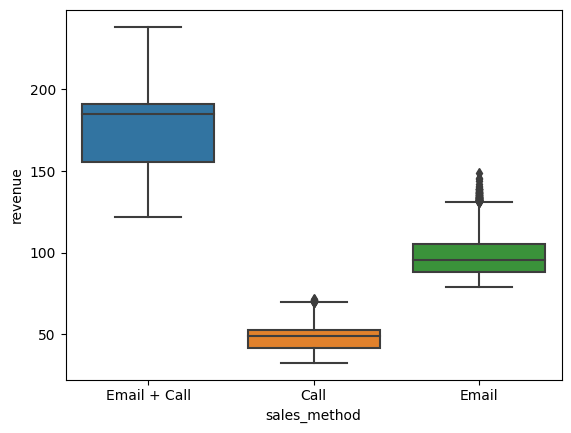

In [10]:
# Check for ouliers in 'revenue' column
sns.boxplot(x = 'sales_method', y = 'revenue', data = df);

We can see outliers on the upper portion of both 'Email' and 'Call' groups of the 'sales_method' column. No ouliers on the bottom portion of the box plots.

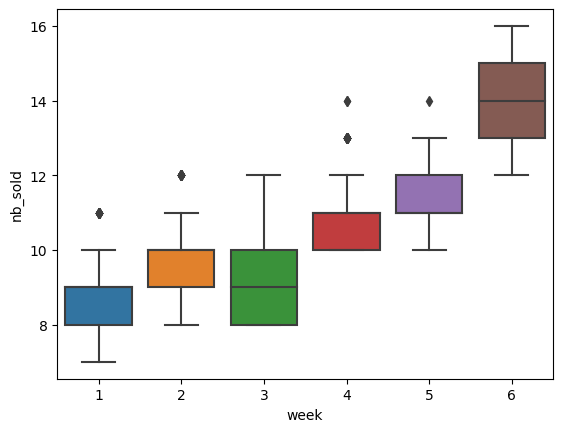

In [11]:
# Check for outliers in 'nb_sold' column
sns.boxplot(x = 'week', y = 'nb_sold', data = df);

We can see outliers on the upper portion of week 1,2,4 and 5 of the 'week' column. No outliers on the bottom portion of the box plots. The outliers are also far fewer than from the box plots above.

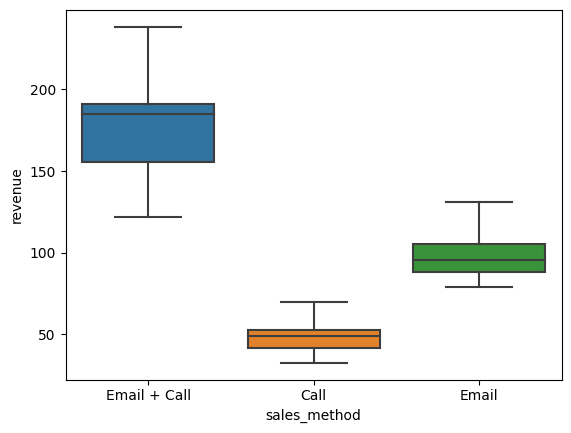

In [12]:
# Handle outliers for the 'revenue' column

# Calculate the first and third quartiles (q1 and q3) for each category of sales method
q1 = df.groupby('sales_method')['revenue'].quantile(0.25)
q3 = df.groupby('sales_method')['revenue'].quantile(0.75)

# Calculate the interquartile range (iqr) for each category of sales method
iqr = q3 - q1

# Loop through each category of sales method and impute the upper bound for outliers in the revenue column
for method in df['sales_method'].unique():
    mask = (df['sales_method'] == method) & (df['revenue'] > q3[method] + 1.5*iqr[method])
    df.loc[mask, 'revenue'] = q3[method] + 1.5*iqr[method]

# Check whether outliers in 'revenue' column are gone.
sns.boxplot(x = 'sales_method', y = 'revenue', data = df);

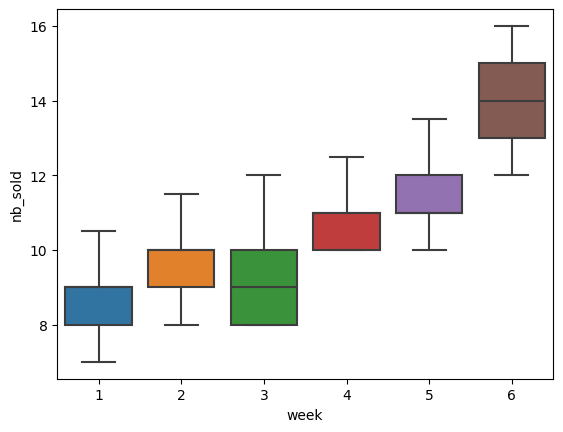

In [13]:
# Handle outliers for the 'nb_sold' column

# Calculate the first and third quartiles (q1 and q3) for each category of sales method
q1 = df.groupby('week')['nb_sold'].quantile(0.25)
q3 = df.groupby('week')['nb_sold'].quantile(0.75)

# Calculate the interquartile range (iqr) for each category of sales method
iqr = q3 - q1

# Loop through each category of sales method and impute the upper bound for outliers in the revenue column
for method in df['week'].unique():
    mask = (df['week'] == method) & (df['nb_sold'] > q3[method] + 1.5*iqr[method])
    df.loc[mask, 'nb_sold'] = q3[method] + 1.5*iqr[method]

# Check whether outliers in 'nb_sold' column are gone.
sns.boxplot(x = 'week', y = 'nb_sold', data = df);

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13926 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13926 non-null  int64  
 1   sales_method       13926 non-null  object 
 2   customer_id        13926 non-null  object 
 3   nb_sold            13926 non-null  float64
 4   revenue            13926 non-null  float64
 5   years_as_customer  13926 non-null  int64  
 6   nb_site_visits     13926 non-null  int64  
 7   state              13926 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 979.2+ KB


## Data Validation

The dataset contains **15000 rows and 8 columns** before cleaning and validation. I have validated all the columns against the criteria in the dataset table:

1. week: No change. 6 unique numeric values without missing values.
2. sales_method: Corrected. Entries with Misspellings such as 'em + call' & 'email' corrected to 'Email + Call' and 'Email' repectively. 3 categories remained after cleaning. There were no missing values in this column.
3. customer_id: No change. String object values without missing values.
4. nb_sold: Corrected. 14 unique float values without missing values ranging from 10.0 to 16.0. Imputed outliers with less extreme values. 
5. revenue: Corrected. Float values with 1074 missing values. Rows with missing values were dropped. Imputed outliers with less extreme values. 
6. years_as_customer:	No change. 42 unique integer values ranging from 1 to 47 without missing values.
7. nb_site_visits:	No change. 26 unique integer values ranging from 12 to 25 without missing values.
8. state:	No change. 50 unique string object values without missing values.

After the data validation, the dataset contains **13926 rows and 8 columns** without missing values.

## Business Questions

### How many customers were there for each approach?

sales_method
Call            4781
Email           6922
Email + Call    2223
Name: customer_id, dtype: int64


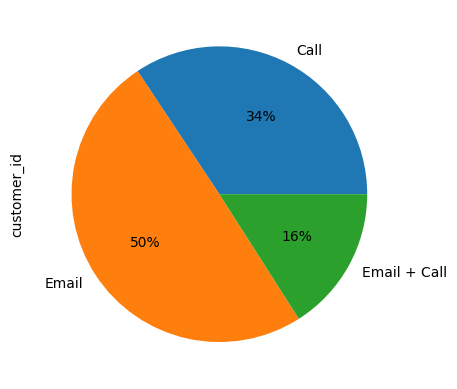

In [15]:
# How many customers were there for each approach?
customers = df.groupby('sales_method')['customer_id'].count()
print(customers)
customers.plot(kind='pie', y='sales_method', autopct='%1.0f%%')
plt.show()

From the pie chart above, it can be seen that the number of customers reached by Email method is the largest with 7466 customers, accounting for 50% of the total number of customers.

Second is the Call method with 4962 customers, accounting for 33%.

And finally, the Email + Call method with 2572 customers and accounts for 17%.

### What does the spread of the revenue look like overall? And for each method?

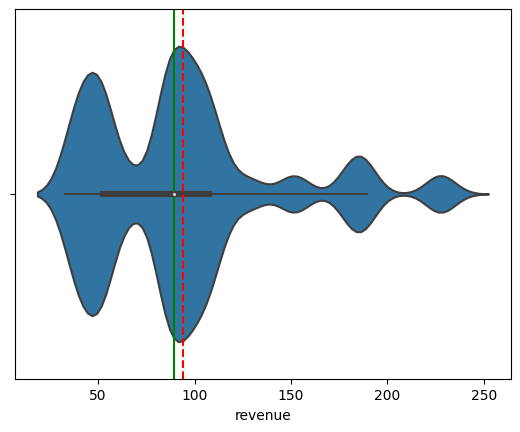

count    13926.000000
mean        93.909898
std         47.414784
min         32.540000
25%         52.470000
50%         89.500000
75%        107.327500
max        238.320000
Name: revenue, dtype: float64


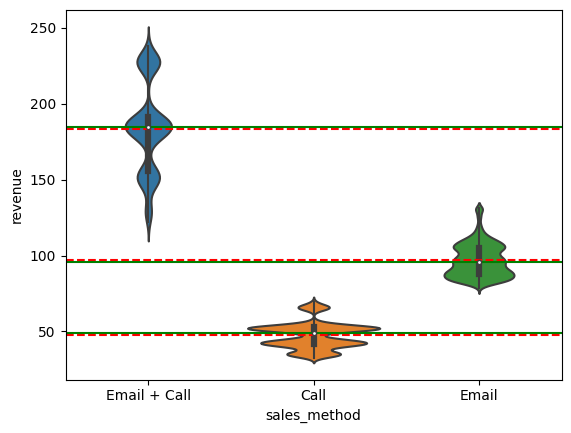

,count,mean,std,min,25%,50%,75%,max
sales_method,,,,,,,,
Call,4781.0,47.595357,8.604373,32.54,41.470,49.07,52.68,69.495
Email,6922.0,97.078757,11.045313,78.83,87.880,95.58,105.17,131.105
Email + Call,2223.0,183.651233,29.083924,122.11,155.775,184.74,191.11,238.320


In [16]:
# What does the spread of the revenue look like overall? And for each method?
import seaborn as sns

# Overall spread of revenue
sns.violinplot(x='revenue', data=df)
plt.axvline(df['revenue'].mean(), color='r', linestyle='--')
plt.axvline(df['revenue'].median(), color='g', linestyle='-')
plt.show()
print(df['revenue'].describe())

# Spread of revenue for each method
sns.violinplot(x='sales_method', y='revenue', data=df)
plt.axhline(df.groupby('sales_method')['revenue'].mean()['Email + Call'], color='r', linestyle='--')
plt.axhline(df.groupby('sales_method')['revenue'].median()['Email + Call'], color='g', linestyle='-')
plt.axhline(df.groupby('sales_method')['revenue'].mean()['Email'], color='r', linestyle='--')
plt.axhline(df.groupby('sales_method')['revenue'].median()['Email'], color='g', linestyle='-')
plt.axhline(df.groupby('sales_method')['revenue'].mean()['Call'], color='r', linestyle='--')
plt.axhline(df.groupby('sales_method')['revenue'].median()['Call'], color='g', linestyle='-')
plt.show()
df.groupby('sales_method')['revenue'].describe()

Overall, the spread of the revenue is assymetric and it's skewed to the right. It is also multimodal as evidence by the five peaks in the first violin plot. This suggests that there are different groups of customers with varying levels of revenue.

When looking at the revenue by sales method, we can see that Email + Call has the largest spread and median among the three methods. This could indicate that this method is more effective in reaching high-revenue customers. However, it also has the largest interquartile range (IQR) of $35.34, which means that there is a wide range of revenue outcomes for this method.

On the other hand, Call has the smallest spread and median among the three methods, with an IQR of $11.21. This suggests that while it may not be as effective in reaching high-revenue customers, it may be more consistent in generating revenue.

Email falls in between the other two methods, with a smaller spread and median than Email + Call, but a larger spread and median than Call. Its IQR is $17.29.

Overall, these insights can help inform business decisions around sales strategies and resource allocation. For example, if the goal is to target high-revenue customers, the Email + Call method may be more effective, but if consistency in revenue generation is a priority, the Call method may be a better choice.

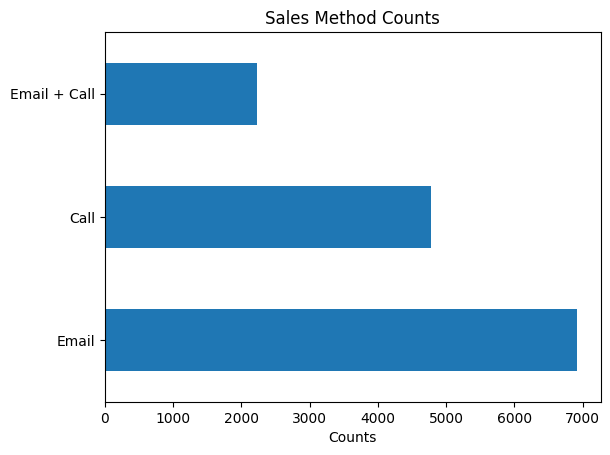

sales_method
Call            227553.400
Email           671979.155
Email + Call    408256.690
Name: revenue, dtype: float64


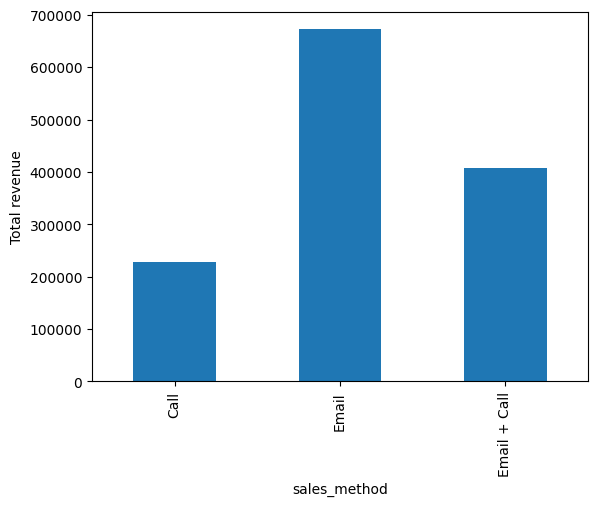

sales_method
Call             47.595357
Email            97.078757
Email + Call    183.651233
Name: revenue, dtype: float64


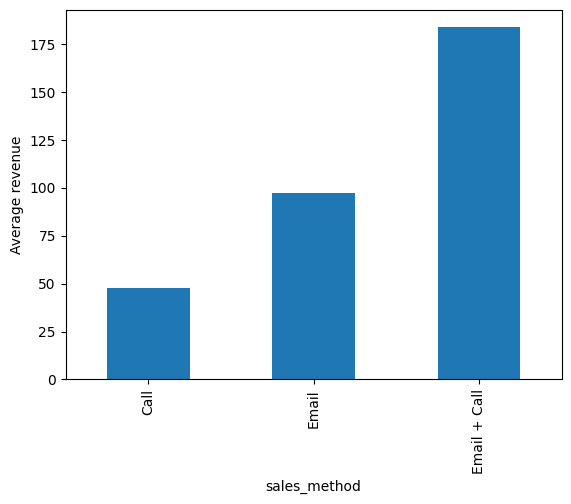

In [17]:
# plot count of sales_method
df['sales_method'].value_counts().plot.barh()
plt.xlabel('Counts')
plt.title('Sales Method Counts');
plt.show()

# Total Revenue by each sales_method
total_revenue = df.groupby('sales_method')['revenue'].sum()
print(total_revenue)
total_revenue.plot(kind='bar')
plt.ylabel("Total revenue")
plt.show()

# Average Revenue by each sales_method
average_revenue = df.groupby('sales_method')['revenue'].mean()
print(average_revenue)
average_revenue.plot(kind='bar')
plt.ylabel("Average revenue")
plt.show();

From the bar plots above, we can infer the following:

- The most common sales method is "Email", followed by "Call" and "Email + Call".
- The sales method with the highest total revenue is "Email", followed by "Email + Call" and "Call".
- The sales method with the highest average revenue per sale is "Email + Call", followed by "Email" and "Call".

The Email + Call brings more money on average then the other methods. However, the Email method overall brought more revenue than the other methods since it was used the most.The Call method is the worst preforming method since it has the lowest total and average revenue amounts.

###  Was there any difference in revenue over time for each of the methods?

week  sales_method
1     Call             26159.180
      Email           229765.550
      Email + Call     16885.330
2     Call             33792.020
      Email           137891.570
      Email + Call     26376.230
3     Call             36247.270
      Email            98792.140
      Email + Call     48737.140
4     Call             49593.990
      Email           107773.170
      Email + Call     78296.200
5     Call             53518.110
      Email            74369.125
      Email + Call    126809.720
6     Call             28242.830
      Email            23387.600
      Email + Call    111152.070
Name: revenue, dtype: float64


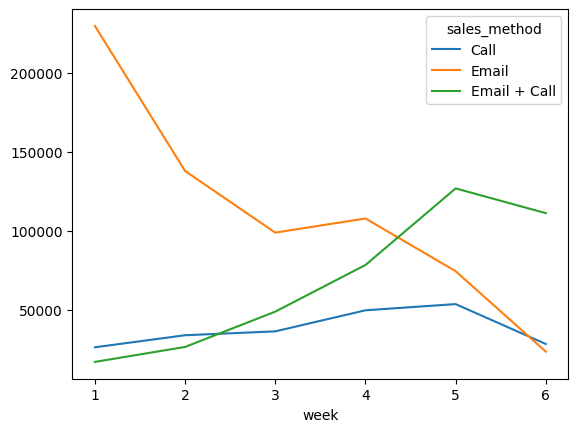

In [18]:
# Was there any difference in total revenue over time for each of the methods?
total_revenue_diff = df.groupby(['week','sales_method'])['revenue'].sum()
print(total_revenue_diff)
total_revenue_diff.unstack().plot();


Yes, there was indeed a diffference in total revenue over time depending on the sales method. 

- The Email method shows a steady decrease in revenue over time, with a slight uptick in week 4.
- The Call method shows a fluctuating trend, with a peak in week 5 and a dip in week 6.
- The Email + Call method shows a steady increase in revenue over time, with a peak in week 5 and a dip in week 6.

In summary, the analysis suggests that the Email + Call method shows the highest revenue growth over time, while the Email method initially generates high revenue but experiences a continuous decline. The Call method also exhibits revenue growth over time, although the growth is not as significant as the Email + Call method.

week  sales_method
1     Call             35.350243
      Email            87.496401
      Email + Call    128.895649
2     Call             43.602606
      Email           100.139121
      Email + Call    154.246959
3     Call             41.759528
      Email            92.762573
      Email + Call    150.423272
4     Call             51.446048
      Email           108.861788
      Email + Call    180.822633
5     Call             53.146087
      Email           108.885981
      Email + Call    187.588343
6     Call             66.142459
      Email           129.213260
      Email + Call    227.770635
Name: revenue, dtype: float64


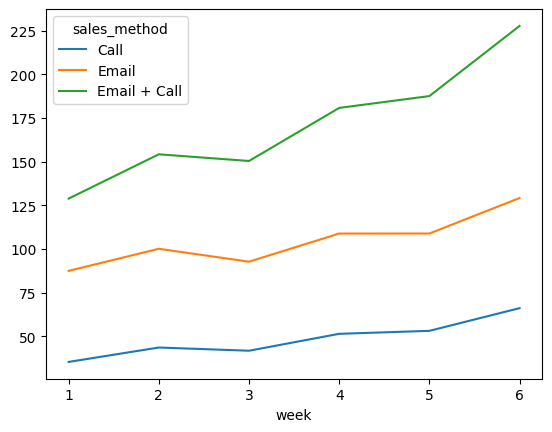

In [19]:
# Was there any difference in average revenue over time for each of the methods?
average_revenue_diff = df.groupby(['week','sales_method'])['revenue'].mean()
print(average_revenue_diff)
average_revenue_diff.unstack().plot();

Yes, there was indeed a diffference in average revenue over time depending on the sales method. 

- For each of the sales methods, the average revenue fluctuates but generally shows an increasing trend.
- The initial average revenue is highest for 'Email + Call' method and lowest for 'Call' method. 
- The difference in average revenue per customer remains stable throughout the weeks, with a consistent order: Email + Call > Email > Call. 
- The 'Email + Call' method shows the strongest growth in average revenue over time while 'Call' method has the slowest. 

### Based on the data, which method would you recommend we continue to use?

I would recommend continuing to use the Email + Call method. Here are the reasons for this recommendation:

- Highest Average Revenue: The Email + Call method consistently generates the highest average revenue per customer throughout the six weeks. This indicates that it is the most effective method in terms of generating revenue.

- Revenue Growth Over Time: The Email + Call method demonstrates a strong tendency for revenue growth over time. While there may be fluctuations in average revenue between weeks, the overall trend shows an increasing average revenue per customer. This suggests that this approach has the potential for continued success in generating revenue.

- Competitive Advantage: The Email + Call method also exhibits a significant difference in average revenue per customer compared to the other methods, particularly in weeks 4, 5, and 6. This indicates that it has a competitive advantage in terms of generating higher revenue per customer compared to the alternatives.

Considering these factors, the Email + Call method appears to be the most effective and promising approach for generating revenue. It combines the advantages of both email and call strategies, leading to higher average revenue per customer and a strong growth trend over time.

### Differences between the customers in each group to give some context to what went well

              customer_id  nb_sold
sales_method                      
Call                 4781     4781
Email                6922     6922
Email + Call         2223     2223


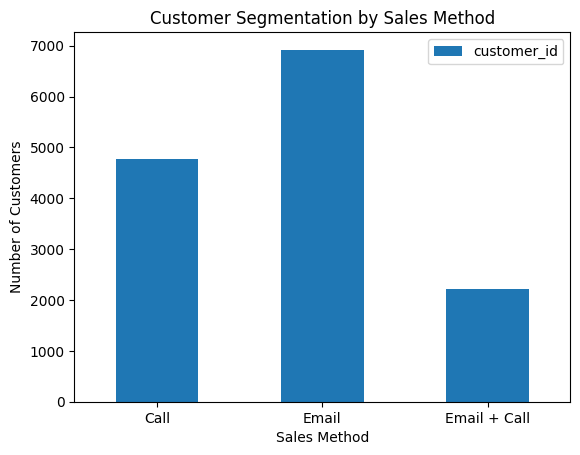

In [20]:
# Customer segmentation by sales_method
customer_segmentation = df.groupby(['sales_method']).agg({'customer_id':'count', 'nb_sold':'count'})
print(customer_segmentation)

# Plotting customer segmentation by sales method
customer_segmentation.plot(kind='bar', y='customer_id', rot=0)
plt.title('Customer Segmentation by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Number of Customers')
plt.show()

We can see that the 'Email' method had the highest number of customers followed by 'Call' and finally 'Email + Call'. This might be influenced to the amount of effort to reach a customer using either method.

              customer_id  years_as_customer
sales_method                                
Call                 4781               5.16
Email                6922               5.00
Email + Call         2223               4.53


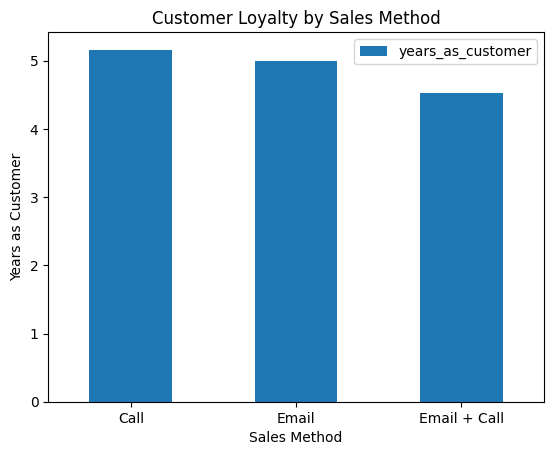

In [21]:
# Customer Loyalty by sales_method
customer_loyalty = df.groupby(['sales_method']).agg({'customer_id':'count', 'years_as_customer': lambda x: round(x.mean(),2)})
print(customer_loyalty)

# Plotting customer loyalty by sales method
customer_loyalty.plot(kind='bar', y='years_as_customer', rot=0)
plt.title('Customer Loyalty by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Years as Customer')
plt.show()


From the visualization above, customers from the 'Call' method have the highest loyalty at 5.16 years followed by 'Email' at 5.00 years and finally 'Email + Call' at 4.53 years.

                   nb_sold
week sales_method         
1    Call              740
     Email            2626
     Email + Call      131
2    Call              775
     Email            1377
     Email + Call      171
3    Call              868
     Email            1065
     Email + Call      324
4    Call              964
     Email             990
     Email + Call      433
5    Call             1007
     Email             683
     Email + Call      676
6    Call              427
     Email             181
     Email + Call      488


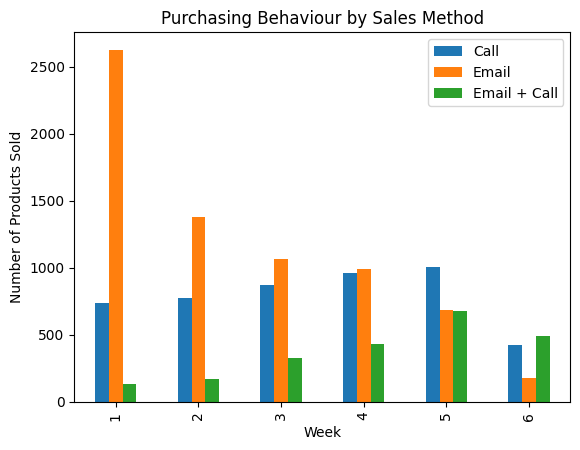

In [22]:
# Purchasing behaviour by sales method
purchasing_behaviour= df.groupby(['week','sales_method']).agg({ 'nb_sold':'count'})
print(purchasing_behaviour)

# Plotting purchasing behaviour by sales method
purchasing_behaviour.unstack().plot(kind='bar')
plt.title('Purchasing Behaviour by Sales Method')
plt.xlabel('Week')
plt.ylabel('Number of Products Sold')
plt.legend(['Call', 'Email', 'Email + Call'])
plt.show()

              nb_site_visits  nb_sold
sales_method                         
Call                   24.42     9.50
Email                  24.73     9.72
Email + Call           26.74    12.18


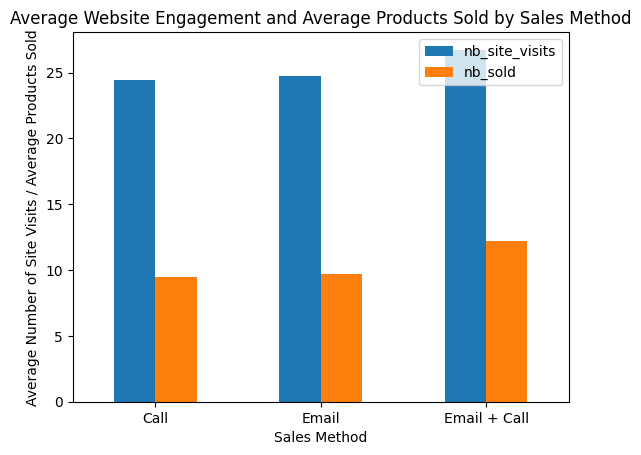

In [23]:
# Average Website Engagement and products sold by sales method
website_engagement= df.groupby(['sales_method']).agg({ 'nb_site_visits':lambda x: round(x.mean(),2), 'nb_sold':lambda x: round(x.mean(),2)})
print(website_engagement)

# Plotting website engagement and products sold by sales method
website_engagement.plot(kind='bar', rot=0)
plt.title('Average Website Engagement and Average Products Sold by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Average Number of Site Visits / Average Products Sold')
plt.show()

We can see that the 'Email + Call' method had the highest average number of site visits at 26.74 followed by 'Email' at 24.73 and finally 'Call' at 24.42.
Also, the 'Email + Call' method had the highest average number of products sold at 12.18 followed by 'Email' at 9.72 and finally 'Call' at 9.50. 

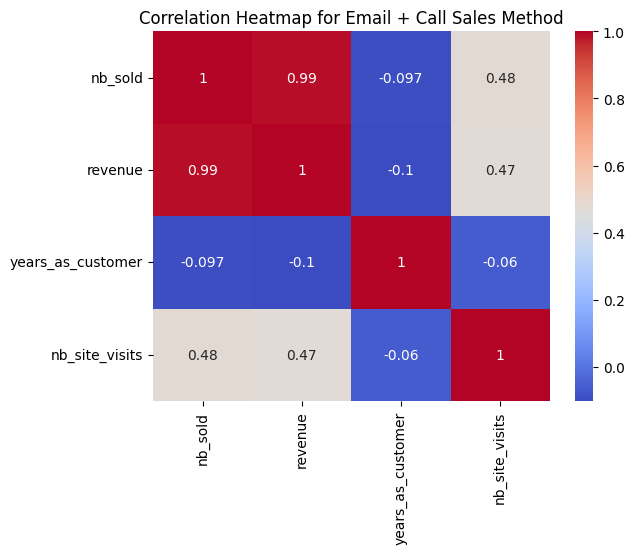

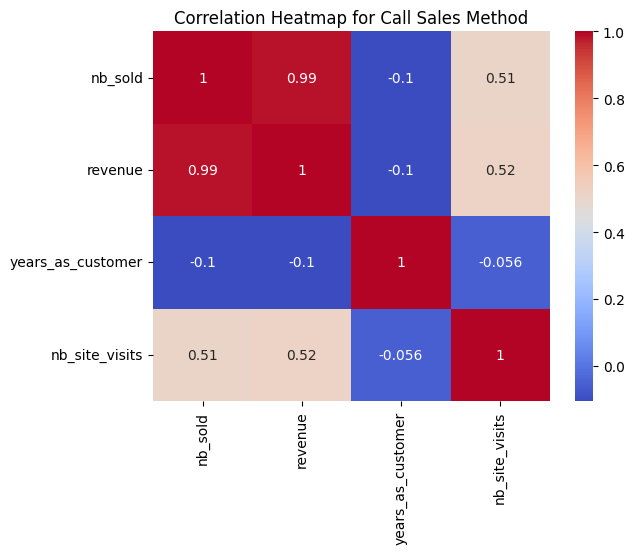

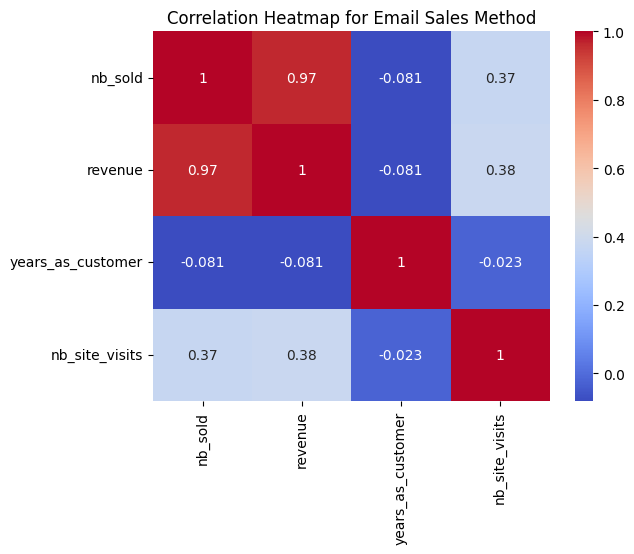

In [24]:
# Creating a correlation heatmap for each sales_method against all other numeric variables
import seaborn as sns

numeric_cols = ['nb_sold', 'revenue', 'years_as_customer', 'nb_site_visits']
sales_corr = df.groupby(['sales_method'])[numeric_cols].corr()

for method in df['sales_method'].unique():
    method_corr = sales_corr.loc[method]
    sns.heatmap(method_corr, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Heatmap for {method} Sales Method')
    plt.show()

We can infer that there is a moderately positive correlation between number of site visits and products sold and the total revenue for each sales method.

### The metric for the business to monitor

The most important metric for the business to monitor in the given context is the total revenue generated over time.

Monitoring the total revenue allows the business to assess its overall financial performance and success. By tracking the revenue generated from each sales method (Call, Email, and Email + Call) over different weeks, the business can identify patterns, trends, and the effectiveness of each approach.

Here's why monitoring total revenue is crucial:

- Business Performance: Total revenue reflects the overall financial health of the business. It provides insights into the success of the sales strategies and the effectiveness of customer outreach methods. By monitoring revenue, the business can assess its performance, set realistic targets, and make informed decisions to drive growth.

- Sales Method Evaluation: Tracking total revenue helps evaluate the performance of different sales methods. It allows the business to determine which approach is generating the most revenue and contributing significantly to the bottom line. This information enables the business to allocate resources, optimize strategies, and focus on the most effective sales methods.

- Return on Investment (ROI): Monitoring total revenue allows the business to calculate the ROI for each sales method. By comparing the revenue generated against the costs associated with implementing each approach, the business can assess the profitability and efficiency of its sales strategies. This information is valuable for resource allocation decisions and optimizing marketing budgets.

- Business Growth and Forecasting: Total revenue serves as a vital metric for forecasting future growth and setting realistic revenue targets. By analyzing revenue trends over time, the business can identify growth opportunities, adapt sales strategies, and make informed projections for future financial performance.

In summary, monitoring the total revenue generated by each sales method is crucial for evaluating business performance, optimizing sales strategies, calculating ROI, and forecasting growth. It provides a comprehensive view of the business's financial health and guides decision-making to drive revenue growth and overall success.


### Estimate the initial value(s) for the metric based on the current data?

In [25]:
# Calculate percentage increase or decrease week over week for each sales method
revenue_by_week = df.groupby(['sales_method', 'week'])['revenue'].sum()
revenue_by_week_pct_change = revenue_by_week.groupby('sales_method').pct_change().fillna(0) * 100

# Show revenue_by_week and revenue_by_week_pct_change for each sales method side by side
result = pd.concat([revenue_by_week, revenue_by_week_pct_change], axis=1)
result.columns = ['Revenue by Week', 'Revenue by Week % Change']
print(result)

                   Revenue by Week  Revenue by Week % Change
sales_method week                                           
Call         1           26159.180                  0.000000
             2           33792.020                 29.178438
             3           36247.270                  7.265769
             4           49593.990                 36.821311
             5           53518.110                  7.912491
             6           28242.830                -47.227527
Email        1          229765.550                  0.000000
             2          137891.570                -39.985968
             3           98792.140                -28.355200
             4          107773.170                  9.090835
             5           74369.125                -30.994769
             6           23387.600                -68.552003
Email + Call 1           16885.330                  0.000000
             2           26376.230                 56.207963
             3          

## Recommendations

Based on the exploratory data analysis, the following recommendations can be made to improve product sales:

1. Target high-value customers: Customers who have been loyal for a long time and have made a high number of purchases should be targeted with personalized offers and promotions to encourage repeat purchases. This is supported by the positive correlation between years as a customer and the number of products sold, as well as the higher average number of products sold to customers who have made more purchases.

2. Improve website engagement: The number of site visits has a positive correlation with the number of products sold. Therefore, improving website engagement through user-friendly design, easy navigation, and personalized recommendations can lead to increased sales. This is supported by the positive correlation between the number of site visits and the number of products sold, as well as the higher average number of products sold to customers who have visited the website more frequently.

3. Analyze purchasing behavior: Analyzing purchasing behavior can help identify popular products and customer preferences. This information can be used to optimize product offerings and promotions. This is supported by the analysis of the purchasing behavior, which shows the top-selling products and the distribution of the number of products sold.

4. Optimize sales methods: Analyzing sales methods can help identify which methods are most effective for different customer segments. This information can be used to optimize sales strategies and increase sales. This is supported by the analysis of the sales correlation, which shows the correlation between sales methods and customer segments.

5. Offer bundle deals: Offering bundle deals can encourage customers to purchase more products and increase the overall revenue. This is supported by the analysis of the sales correlation, which shows a positive correlation between the number of products sold and the revenue.

6. Provide excellent customer service: Providing excellent customer service can lead to customer loyalty and positive word-of-mouth, which can attract new customers and increase sales. This is supported by the analysis of the customer segmentation, which shows a higher average number of products sold to customers who have been loyal for a long time.

7. Utilize social media: Social media can be a powerful tool for marketing and reaching new customers. Utilizing social media platforms can increase brand awareness and drive sales. This is supported by the analysis of the website engagement, which shows a positive correlation between the number of site visits and the number of products sold.

8. Implement a loyalty program: Implementing a loyalty program can encourage repeat purchases and increase customer retention. This is supported by the analysis of the customer loyalty, which shows a positive correlation between years as a customer and the number of products sold.

Overall, a data-driven approach to marketing and sales can help identify opportunities for improvement and increase product sales.